In [32]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller

# Task – 1

In [33]:
df=pd.read_csv("DS3_C1_S2_Weather_Data_Practice.csv",parse_dates=['Date'])
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [34]:
df = df.set_index('Date')
df.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [35]:
df.shape

(3650, 1)

In [36]:
lags = 60
moving_avg = df.rolling(window=lags).mean()
df_ts = pd.DataFrame({'Actual':df['Temp'], 'MA':moving_avg['Temp']})
df_ts.dropna(inplace=True)
df_ts

,Actual,MA
Date,,
1981-03-01,17.8,17.698333
1981-03-02,18.6,17.663333
1981-03-03,17.0,17.648333
1981-03-04,16.0,17.601667
1981-03-05,13.3,17.580000
...,...,...
1990-12-27,14.0,13.543333
1990-12-28,13.6,13.543333
1990-12-29,13.5,13.520000


In [37]:
df_ts.isnull().sum()

Actual    0
MA        0
dtype: int64

In [38]:
df_ts.head(lags)

,Actual,MA
Date,,
1981-03-01,17.8,17.698333
1981-03-02,18.6,17.663333
1981-03-03,17.0,17.648333
1981-03-04,16.0,17.601667
1981-03-05,13.3,17.580000
1981-03-06,14.3,17.555000
1981-03-07,11.4,17.481667
1981-03-08,16.3,17.490000
1981-03-09,16.1,17.468333


In [39]:
df_ts.Actual.head(lags).mean()

13.029999999999996

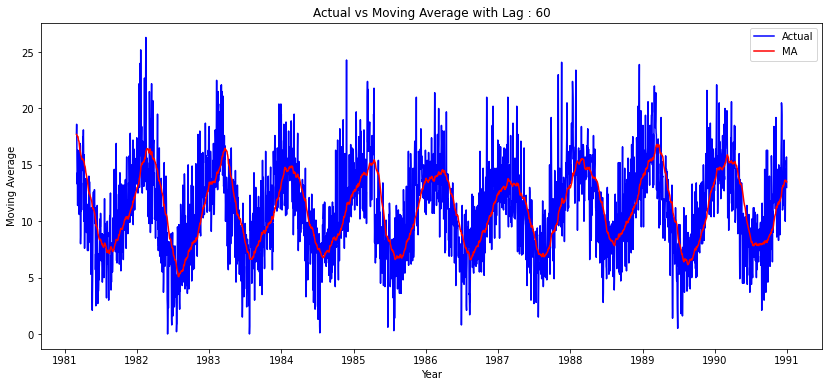

In [40]:
plt.figure(figsize=(14,6))
plt.plot(df_ts.Actual, color='blue', label='Actual')
plt.plot(df_ts.MA,  color='red', label='MA')
plt.title('Actual vs Moving Average with Lag : ' +str(lags))
plt.xlabel('Year')
plt.ylabel('Moving Average')
plt.legend()
plt.show()

# Task – 2

In [41]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

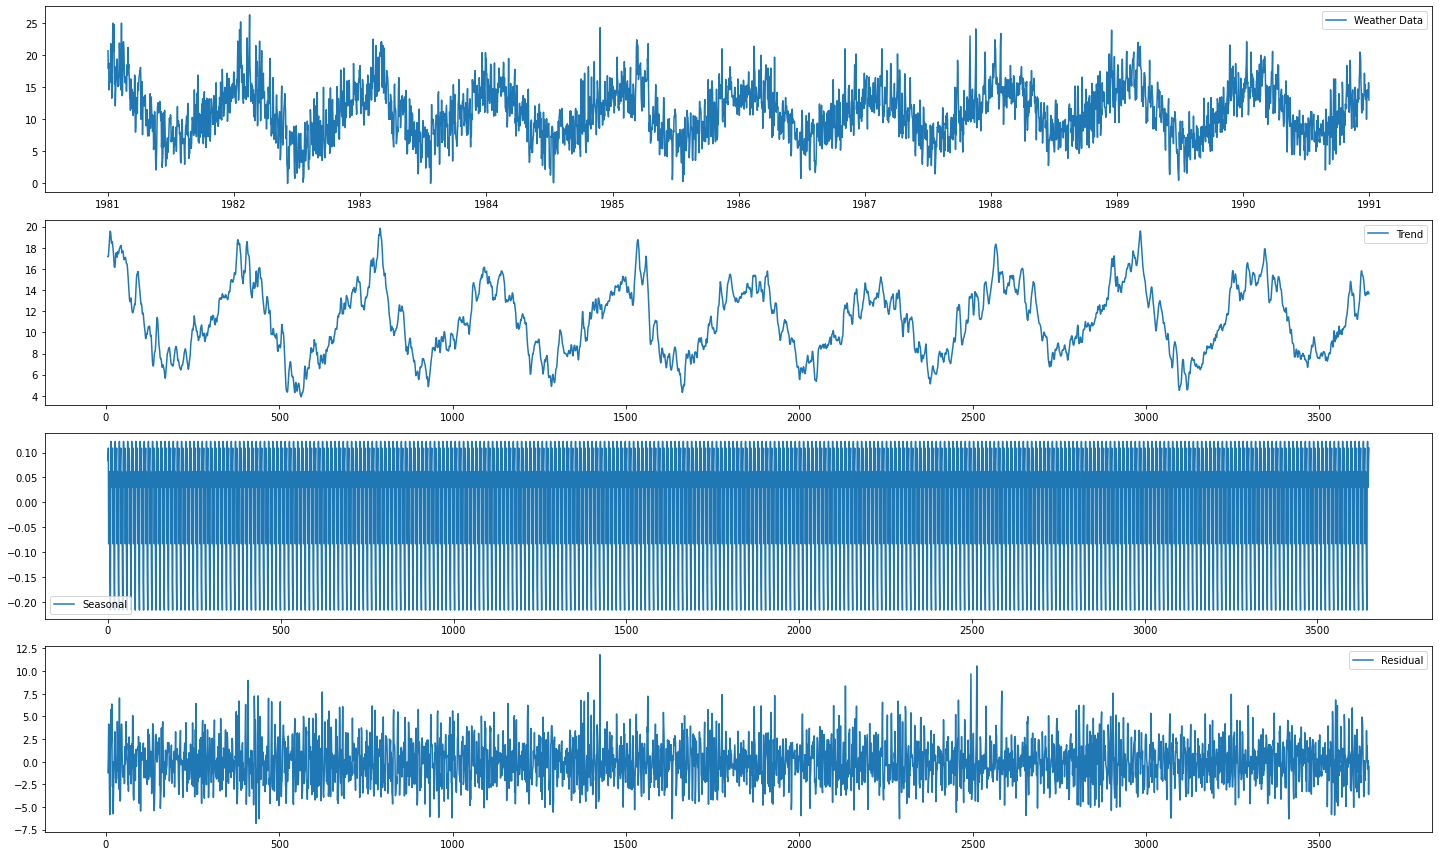

In [42]:
decomposition = seasonal_decompose(np.asarray(df), freq=12)

d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid

fig,ax = plt.subplots(4,1,figsize=(20,12))

plt.subplot(411)
plt.plot(df,label='Weather Data')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend(loc='best')

plt.tight_layout()

# Task 3

In [44]:
from statsmodels.tsa.stattools import adfuller
pvalue = adfuller(df_ts['Actual'])[1]
if pvalue < 0.05:
    print("pvalue={}. Data is Stationary. Proceed to model building".format(pvalue))
else:
    print("pvalue={}. Data is not Stationary. Make the data stationary before model building".format(pvalue))

pvalue=0.0009106803555740964. Data is Stationary. Proceed to model building


# Task 4

In [52]:
model = ExponentialSmoothing(df,trend='additive').fit(smoothing_level=0.2, smoothing_slope=0.5)
# forecast with double exponent smoothing
f_dexp = model.fittedvalues
print(f_dexp)

Date
1981-01-01    16.180457
1981-01-02    17.000627
1981-01-03    17.186700
1981-01-04    17.676889
1981-01-05    16.921351
                ...    
1990-12-27    13.729330
1990-12-28    13.645129
1990-12-29    13.493255
1990-12-30    13.352431
1990-12-31    13.914528
Length: 3650, dtype: float64


Text(0.5, 1.0, 'Double Exponent Smoothing')

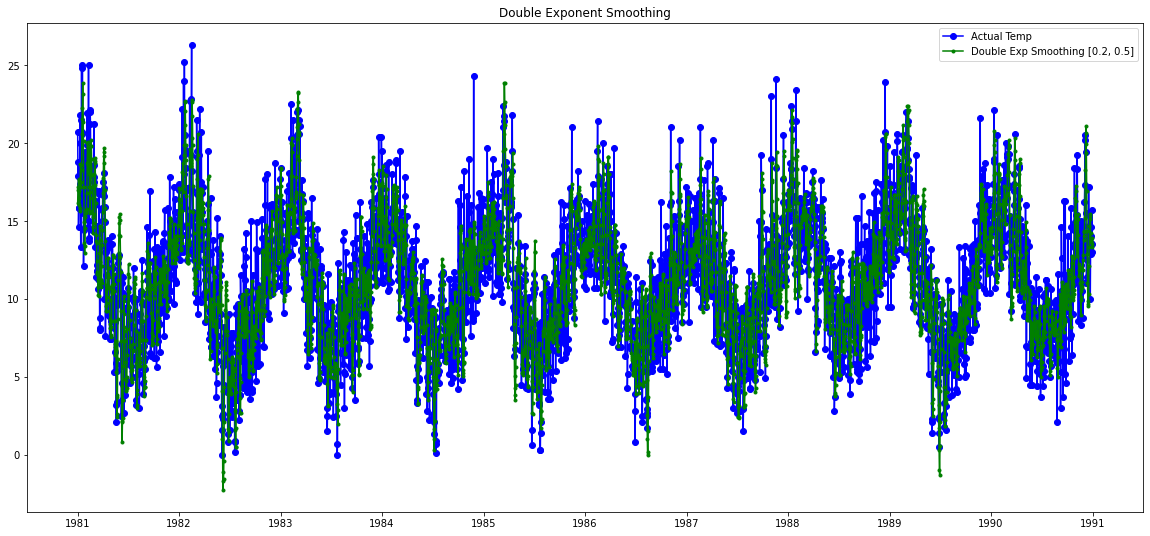

In [53]:
fig,ax = plt.subplots(1,1,figsize=(20, 9))
plt.plot(df,marker='o',color='blue',label='Actual Temp')
plt.plot(f_dexp, marker='.',color='green',label='Double Exp Smoothing [0.2, 0.5]')
plt.legend()
plt.title('Double Exponent Smoothing')

In [54]:
model = ExponentialSmoothing(df.values,trend='add',seasonal='add',seasonal_periods=12).fit()

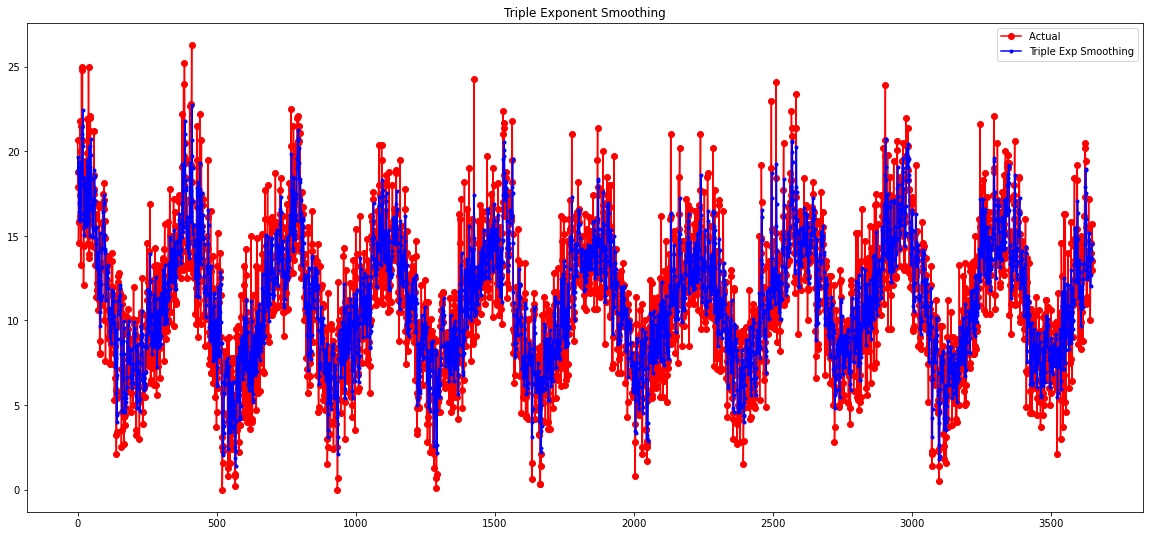

In [55]:
fig,ax = plt.subplots(1,1,figsize=(20, 9))
plt.plot(df.values, marker='o',color='red',label='Actual ')
plt.title('Triple Exponent Smoothing')
plt.plot(model.fittedvalues,marker='.',color='blue',label='Triple Exp Smoothing')
plt.legend()
plt.show()